# EDA

In [58]:
# Load the "autoreload" extension so that code can change
%load_ext autoreload

# always reload modules so that as we change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load modules

In [59]:
import pandas as pd
import numpy as np
from os import path
from src.utils.functions import load_params, get_project_dir
from src.data.clean_dataset import true_false_to_int, price_to_int, is_features_valid
from matplotlib import pyplot as plt

In [60]:
PARAMS = load_params()

## Load data

In [61]:
data_path = path.join(get_project_dir(), PARAMS['data']['raw_data_path'], PARAMS["data"]["train_data_file"])

In [62]:
df = pd.read_csv(data_path)

In [63]:
df.shape

(12622, 10)

## Data overview

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12622 entries, 0 to 12621
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             12621 non-null  object 
 1   neighbourhood_group_cleansed  12622 non-null  object 
 2   property_type                 12622 non-null  object 
 3   room_type                     12622 non-null  object 
 4   accommodates                  12622 non-null  int64  
 5   bathrooms_text                12614 non-null  object 
 6   bedrooms                      12153 non-null  float64
 7   beds                          12405 non-null  float64
 8   number_of_reviews             12622 non-null  int64  
 9   price                         12622 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 986.2+ KB


In [65]:
df.head().T

,0,1,2,3,4
host_is_superhost,f,f,f,f,f
neighbourhood_group_cleansed,Gràcia,Horta-Guinardó,Ciutat Vella,Ciutat Vella,Ciutat Vella
property_type,Private room in bed and breakfast,Private room in rental unit,Entire rental unit,Private room in rental unit,Private room in rental unit
room_type,Private room,Private room,Entire home/apt,Private room,Private room
accommodates,1,1,4,2,2
bathrooms_text,1.5 shared baths,1 shared bath,1 bath,1 shared bath,1.5 baths
bedrooms,1.0,2.0,1.0,1.0,1.0
beds,1.0,1.0,2.0,1.0,1.0
number_of_reviews,32,21,14,179,34
price,$28.00,$30.00,$143.00,$53.00,$32.00


Number of duplicates

In [66]:
df.duplicated().sum()

497

Number of missing values

In [67]:
df.isna().sum(axis=0)

host_is_superhost                 1
neighbourhood_group_cleansed      0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    8
bedrooms                        469
beds                            217
number_of_reviews                 0
price                             0
dtype: int64

Number of unique values

In [68]:
df.nunique()

host_is_superhost                 2
neighbourhood_group_cleansed     10
property_type                    59
room_type                         4
accommodates                     16
bathrooms_text                   35
bedrooms                         13
beds                             21
number_of_reviews               466
price                           517
dtype: int64

In [69]:
df.bathrooms_text.unique()

array(['1.5 shared baths', '1 shared bath', '1 bath', '1.5 baths',
       '1 private bath', '3 baths', '2 baths', nan, '2 shared baths',
       '4.5 baths', '11 shared baths', '2.5 baths', '5 shared baths',
       '5 baths', '3 shared baths', '10 shared baths', '2.5 shared baths',
       '0 shared baths', '8 baths', '4 shared baths', '3.5 baths',
       'Half-bath', '4 baths', '5.5 baths', 'Private half-bath',
       '13 shared baths', '0 baths', '6 baths', 'Shared half-bath',
       '3.5 shared baths', '8 shared baths', '12 shared baths',
       '7.5 shared baths', '7.5 baths', '10 baths', '7 shared baths'],
      dtype=object)

In [70]:
df.property_type.unique()

array(['Private room in bed and breakfast', 'Private room in rental unit',
       'Entire rental unit', 'Entire villa', 'Room in boutique hotel',
       'Private room in guest suite', 'Private room in hostel',
       'Private room in condo', 'Room in serviced apartment',
       'Entire serviced apartment', 'Entire condo',
       'Private room in home', 'Entire loft', 'Shared room in villa',
       'Room in hotel', 'Private room in loft',
       'Room in bed and breakfast', 'Private room in serviced apartment',
       'Private room in casa particular', 'Room in hostel', 'Shared room',
       'Entire home', 'Private room in vacation home',
       'Shared room in bed and breakfast', 'Entire vacation home', 'Barn',
       'Shared room in hostel', 'Shared room in casa particular',
       'Private room in tiny home', 'Camper/RV', 'Shared room in tower',
       'Private room in dome', 'Entire guesthouse', 'Entire townhouse',
       'Shared room in rental unit', 'Private room in chalet',
     

In [71]:
df[df.bedrooms.isna()].head().T

,12,68,87,92,102
host_is_superhost,t,f,f,t,f
neighbourhood_group_cleansed,Eixample,Ciutat Vella,Gràcia,Ciutat Vella,Sant Andreu
property_type,Room in boutique hotel,Private room in rental unit,Private room in home,Entire loft,Private room in rental unit
room_type,Private room,Private room,Private room,Entire home/apt,Private room
accommodates,4,2,1,2,2
bathrooms_text,1 shared bath,1 shared bath,2 shared baths,1 bath,1 shared bath
bedrooms,NaN,NaN,NaN,NaN,NaN
beds,2.0,1.0,1.0,1.0,1.0
number_of_reviews,7,0,2,0,62
price,$139.00,$41.00,$45.00,$75.00,$35.00


## Transformations

In [72]:
df.price.str.contains('.00').count()

12622

In [73]:
df.price = df.price.apply(price_to_int)

In [74]:
df.host_is_superhost = df.host_is_superhost.apply(true_false_to_int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12622 entries, 0 to 12621
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             12621 non-null  float64
 1   neighbourhood_group_cleansed  12622 non-null  object 
 2   property_type                 12622 non-null  object 
 3   room_type                     12622 non-null  object 
 4   accommodates                  12622 non-null  int64  
 5   bathrooms_text                12614 non-null  object 
 6   bedrooms                      12153 non-null  float64
 7   beds                          12405 non-null  float64
 8   number_of_reviews             12622 non-null  int64  
 9   price                         12622 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 986.2+ KB


In [76]:
df = df.drop_duplicates()

In [77]:
df.shape

(12124, 10)

In [78]:
df.head()

,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,number_of_reviews,price
0,0.0,Gràcia,Private room in bed and breakfast,Private room,1,1.5 shared baths,1.0,1.0,32,28
1,0.0,Horta-Guinardó,Private room in rental unit,Private room,1,1 shared bath,2.0,1.0,21,30
2,0.0,Ciutat Vella,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,14,143
3,0.0,Ciutat Vella,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,179,53
4,0.0,Ciutat Vella,Private room in rental unit,Private room,2,1.5 baths,1.0,1.0,34,32


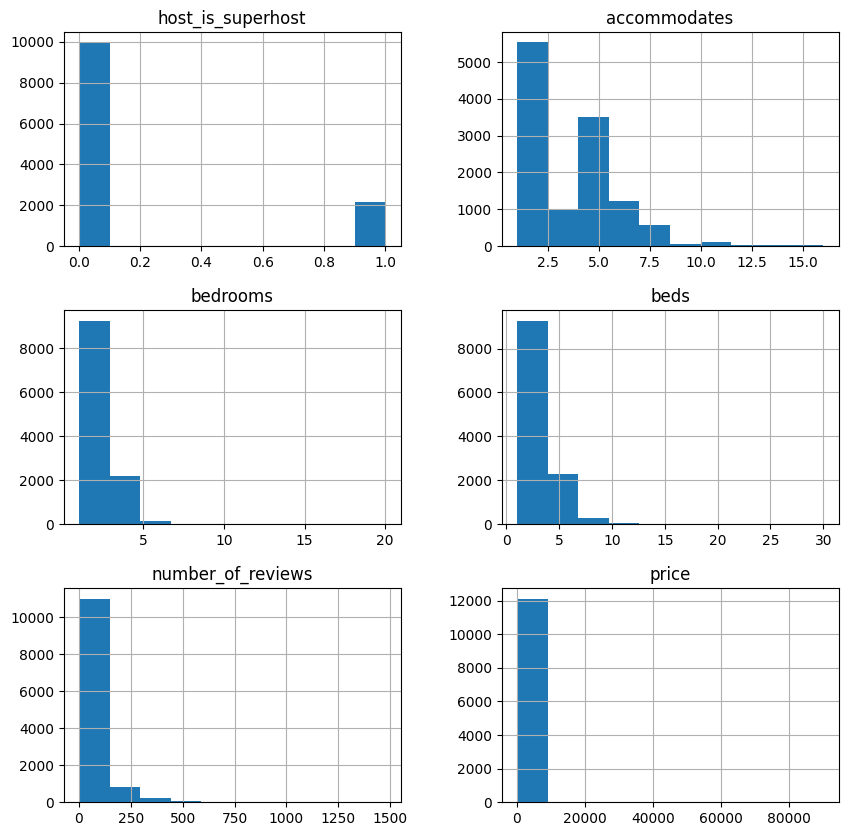

In [79]:
df.hist(figsize=(10, 10))
plt.show()

In [80]:
df = df.dropna(axis=0)

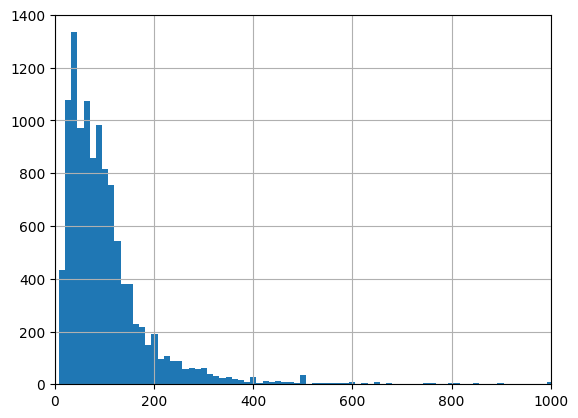

In [81]:
df.price.hist(bins=5000)
plt.xlim(0, 1000)
plt.show()

(0.0, 2000.0)

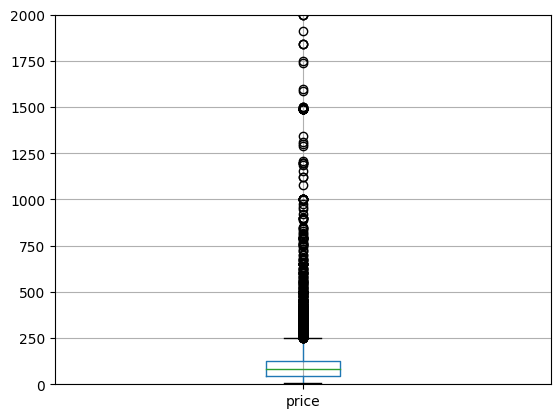

In [82]:
df.boxplot(column='price')
plt.ylim(0, 2000)

In [83]:
df = df[df.apply(is_features_valid, axis=1)].query('price < 1000')

In [84]:
df.shape

(11065, 10)